In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
import altair as alt
import glob
import os

# CAS Data Science Projekt Sleep Analysis - Data Analysis

In [3]:
df = pd.read_csv('prepared/fitbit_data_moon_crisp.csv')
df.dropna(axis=0, inplace=True)

In [4]:
df.head(10)

,Unnamed: 0,date,temperature,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,bpm,Moon Phase
0,0,2022-03-04,-2.494845,67,17,15,35,66,60,0.073479,68.873969,New Moon
2,2,2022-03-10,-3.100641,88,21,22,45,126,60,0.054695,67.206731,First Quarter
3,3,2022-04-25,-3.082295,56,15,15,26,23,56,0.100186,67.187992,Third Quarter
4,4,2022-06-08,-2.983674,75,20,19,36,69,55,0.087816,69.163313,First Quarter
5,5,2022-01-01,-2.141440,68,19,18,31,69,60,0.081197,61.607115,New Moon
8,8,2022-06-09,-2.748225,76,22,16,38,88,54,0.070640,59.214786,First Quarter
9,9,2022-04-24,-2.648158,68,16,15,37,49,54,0.079038,76.126033,Third Quarter
10,10,2022-04-30,-2.834139,78,21,18,39,81,58,0.073281,65.089426,New Moon
11,11,2022-04-18,-2.157149,84,21,22,41,71,53,0.071207,59.130468,Full Moon
12,12,2022-03-11,-1.241001,84,21,18,45,68,58,0.092812,66.110513,First Quarter


In [5]:
import altair as alt
from altair import to_values

values = to_values(df)

alt.Chart.from_dict({
    "data": values,
    "mark": "point",
    "encoding": {
        "x": {
            "field": "date",
            "type": "temporal",
        },
        "color": {
            "field": "Moon Phase",
            "type": "nominal",
        },
         "y": {
            "field": "overall_score",
            "type": "quantitative",
        },
    }
})

alt.Chart(...)

In [6]:
df.groupby('Moon Phase')['deep_sleep_in_minutes'].mean()

Moon Phase
First Quarter    81.225806
Full Moon        77.735294
New Moon         79.518519
Third Quarter    70.080000
Name: deep_sleep_in_minutes, dtype: float64

In [7]:
df.groupby('Moon Phase')['overall_score'].mean()

Moon Phase
First Quarter    77.903226
Full Moon        77.117647
New Moon         77.333333
Third Quarter    74.480000
Name: overall_score, dtype: float64

In [8]:
df.groupby('Moon Phase')['composition_score'].mean()

Moon Phase
First Quarter    19.645161
Full Moon        19.970588
New Moon         19.814815
Third Quarter    19.040000
Name: composition_score, dtype: float64

<AxesSubplot:xlabel='date', ylabel='overall_score'>

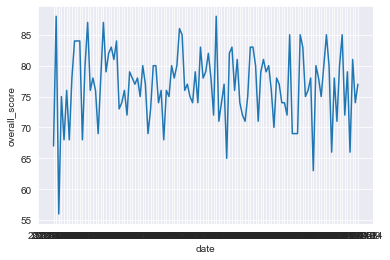

In [9]:
sns.lineplot(data=df, x="date", y="overall_score")

<AxesSubplot:xlabel='Moon Phase', ylabel='overall_score'>

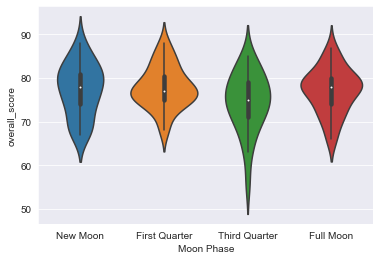

In [14]:
group = df.groupby('Moon Phase')['composition_score'].mean()

sns.violinplot(data=df, x="Moon Phase", y="overall_score")